In [10]:
import textnets as tn
tn.params["seed"] = 42

In [11]:
import pandas as pd

import ast
def tokens_to_list(text):
    text = text[1:-1]
    res = ast.literal_eval(text)
    return list(dict(res).keys())


clusters = pd.read_csv("../../data/bertopic.csv")
clusters = clusters[1:]
clusters= clusters.set_index('Name')
clusters.head()

,Topic,Count,most_freq_tokens
Name,,,
0_accidente_conductor_vehículo_colisión,0,451,"[('accidente', 0.013147867844274892), ('conduc..."
1_salmón_salmones_industria_consejo salmón,1,293,"[('salmón', 0.011826029962445547), ('salmones'..."
2_robo_robos_vehículo_delincuentes,2,293,"[('robo', 0.0142556776557684), ('robos', 0.006..."
3_bomberos_incendio_cuerpo bomberos_emergencia,3,260,"[('bomberos', 0.017599120600600864), ('incendi..."
4_sexual_abuso_abuso sexual_sexuales,4,251,"[('sexual', 0.014554316451458877), ('abuso', 0..."


In [25]:
clusters['tokens'] = clusters.most_freq_tokens.apply(lambda x: str(tokens_to_list(x)))

In [13]:
salud = clusters[clusters['tokens'].str.contains('salud')]
salud

,Topic,Count,most_freq_tokens,tokens
Name,,,,
9_hospital_salud_servicio salud_hospital ancud,9,188,"[('hospital', 0.014874700526929772), ('salud',...","['hospital', 'salud', 'servicio salud', 'hospi..."
26_casos activos_asociadas virus_causas asociadas virus_conectadas ventilación,26,115,"[('casos activos', 0.010288380583916023), ('as...","['casos activos', 'asociadas virus', 'causas a..."
33_mental_salud mental_salud_ansiedad,33,96,"[('mental', 0.014615182564590809), ('salud men...","['mental', 'salud mental', 'salud', 'ansiedad'..."
35_casos_contagios_nuevos casos_cifra,35,93,"[('casos', 0.010670285591966845), ('contagios'...","['casos', 'contagios', 'nuevos casos', 'cifra'..."
47_casos_exámenes_test_positividad,47,79,"[('casos', 0.007975782933085502), ('exámenes',...","['casos', 'exámenes', 'test', 'positividad', '..."
63_obesidad_dieta_alimentos_nutrición,63,60,"[('obesidad', 0.009864805602746217), ('dieta',...","['obesidad', 'dieta', 'alimentos', 'nutrición'..."
64_pandemia_turismo_salud_medidas,64,58,"[('pandemia', 0.0047947614943302744), ('turism...","['pandemia', 'turismo', 'salud', 'medidas', 's..."
83_contagios_virus_casos_dosis,83,45,"[('contagios', 0.008241734361890848), ('virus'...","['contagios', 'virus', 'casos', 'dosis', 'vacu..."
88_casos_contagios_río negro_provincia,88,43,"[('casos', 0.016499313808898377), ('contagios'...","['casos', 'contagios', 'río negro', 'provincia..."


In [14]:
#!py -m spacy download es_core_news_sm

In [15]:
corpus = tn.Corpus.from_df(salud, doc_col="tokens", lang="es_core_news_sm")

In [16]:
corpus

<Corpus with 39 documents using language model 'es_core_news_sm'>

In [17]:
t = tn.Textnet(corpus.tokenized(), min_docs=1)

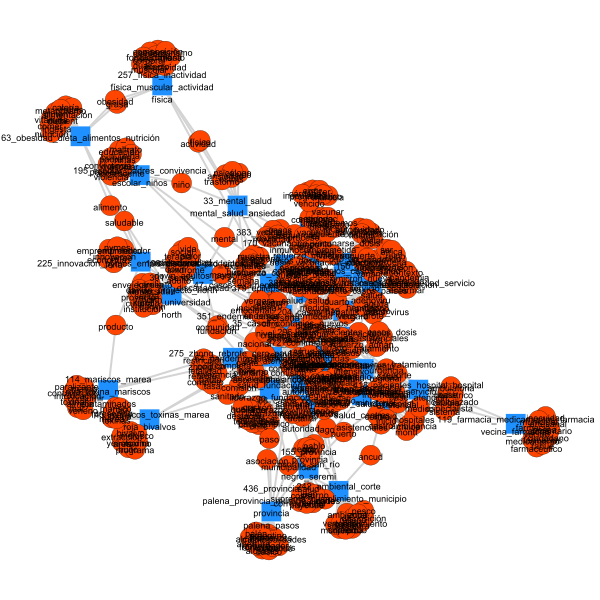

In [30]:
t.plot(label_nodes=True)

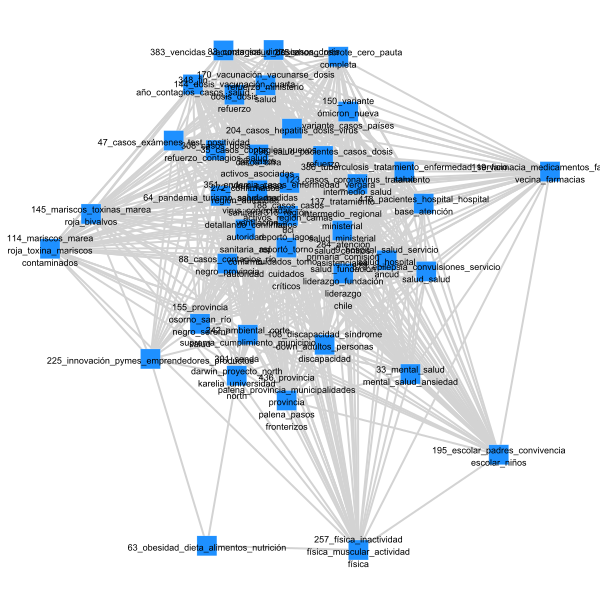

In [31]:
papers = t.project(node_type="doc")
papers.plot(label_nodes=True)

In [20]:
words = t.project(node_type="term")
words.top_betweenness()

atención     5282.5
sanitario    4999.5
seremi       4668.0
físico       4453.0
mental       4230.0
emocional    3709.5
fundación    3520.0
mundial      2987.5
persona      2705.5
saludable    2516.0
dtype: float64

words.plot(label_nodes=True,
           scale_nodes_by="betweenness",
           color_clusters=True,
           alpha=0.5,
           edge_width=[10*w for w in words.edges["weight"]],
           edge_opacity=0.4,
           node_label_filter=lambda n: n.betweenness() > words.betweenness.median()
          )

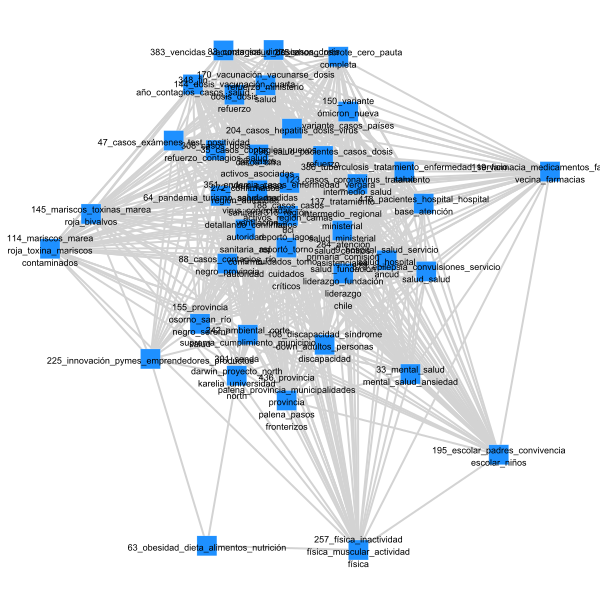

In [35]:
topic_name = t.project(node_type="doc")
topic_name.plot(label_nodes=True)

In [36]:
topic_name.top_betweenness()

33_mental_salud mental_salud_ansiedad                                                                        70.0
296_salud_pacientes_casos_dosis refuerzo                                                                     65.0
284_atención primaria_comisión salud_fundación liderazgo_fundación liderazgo chile                           60.0
272_confirmados región_autoridad sanitaria detallando_confirmó autoridad sanitaria_así confirmó autoridad    50.0
35_casos_contagios_nuevos casos_cifra                                                                        47.0
64_pandemia_turismo_salud_medidas                                                                            33.0
379_epilepsia_convulsiones_servicio salud_salud                                                              31.0
88_casos_contagios_río negro_provincia                                                                       30.0
145_mariscos_toxinas_marea roja_bivalvos                                                

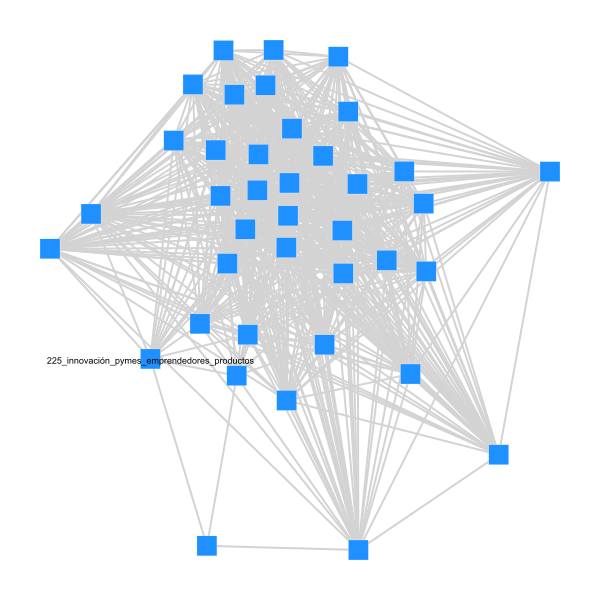

In [39]:
plot = topic_name.plot(
        label_nodes=True,
        label_edges=True,
        node_label_filter=lambda v: v.degree() > 15 and v.degree() < 30, # >36
        edge_label_filter=lambda e: e["weight"] > 1000,
    )
plot

https://textnets.readthedocs.io/en/stable/_modules/textnets/corpus.html

https://textnets.readthedocs.io/en/stable/index.html

https://textnets.readthedocs.io/en/stable/advanced.html
